<a href="https://colab.research.google.com/github/AmandinChyba/Project1-Fields-2022/blob/main/Walk_on_Boundary_and_BIEM/Walk_on_Boundary_in_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import jax
from jax import lax
from jax import random

import jax.numpy as jnp
import numpy as np
import math

import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from functools import partial
import scipy.optimize as opt

In [3]:
def pointsOfParameterizedSurface(xfunc,yfunc):
  # should take in a parameterized surface and output points along the surface
  # I'm not sure if this will help us but let's see
  x_coord = xfunc
  y_coord = yfunc
  surf = [[x_coord],[y_coord]]
  return surf

def sdf(x,y):
  return jnp.sqrt(jnp.abs(1 - jnp.power(x,2) - jnp.power(y,2)))

def findNewPoint(r_0,r_d,sdf,max_steps):
  t = 0.0
  for i in range(max_steps):
    r = r_0 + t*r_d
    t = t + sdf(r)
  return t

def rotMatrix(phi):
  # will create a rotation matrix from the randomly-generated phi
  R = [[np.cos(phi), -np.sin(phi)], [np.sin(phi), np.cos(phi)]]
  return R

def rot(x):
  # will rotate a vector x to a new vector y - make sure x is a column vector
  y = np.matmul(R,x)
  return y

# def parameterizeToLine(A,vect,t):
#   parameterizes a line with a value at a point A = (x,y) 
#   and a direction given by vect
#   x_coord = A[0] + np.multiply(vect[0],t)
#   y_coord = A[1] + np.multiply(vect[1],t)
#   line = [[x_coord],[y_coord]]
#   return line

In [6]:
r_0 = jnp.array([0,0.5])
epochs = 30
key = random.PRNGKey(int(time.time()))
theta = random.uniform(key,(1,epochs+1),minval=0,maxval=2*jnp.pi)

def wobstep(r_0,theta,ray):
  r_d = jnp.array([jnp.cos(theta),jnp.sin(theta)])

  def line_para(t):
    x = r_0[0] + t*r_d[0]
    y = r_0[1] + t*r_d[1]
    return x,y

  def fun(t1):
    x1,y1 = line_para(t1)
    return sdf(x1,y1)

  if ray:
    test = opt.fsolve(fun,5)
    return line_para(test)
  else:
    test_pos = opt.fsolve(fun,-5)
    test_neg = opt.fsolve(fun,5)
    pred = math.isclose(test_neg,0,abs_tol=1e-03)
    newVal = test_neg
    if pred:
      newVal = test_pos
    return line_para(newVal)

def boundaryCond(r):
  return r[1]

Y = np.empty(epochs+1)
r_current = wobstep(r_0,theta[0,0],True)
Y[0] = boundaryCond(r_current)
for i in range(1,epochs+1):
  r_current = wobstep(r_current,theta[0,i],False)
  Y[i] = boundaryCond(r_current)

Y[:-1] = 2*Y[:-1]
Y[1::2] = -Y[1::2]
Estimator = np.sum(Y)


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [23]:
# old stuff
phi = np.pi/2
R = rotMatrix(phi)
starting_vector = np.array([1,0])
new_vector = rot(starting_vector)
point = [0,4]
print(new_vector)
print(point)
# gives system of equations to find intersection of the curve 
# with the new line generated
# the system being solved is:
  # x(theta) - t*x_of_new_vector - x0 = 0
  # y(theta) - t*y_of_new_vector - y0 = 0
# (x0,y0) is the point on the boundary you're currently at
# new_vector is the vector generated from the random phi rotation
# t is the parameter for the new line generated
# (x(theta),y(theta)) is the parameterization for the curve
# the functions x and y need to be inputted - they are in general nonlinear,
# which is why fsolve is being used
def funcToSolve(t):
  return [np.multiply(a,np.cos(t[1])) - np.multiply(t[0],new_vector[0]) - point[0],
          np.multiply(b,np.sin(t[1])) - np.multiply(t[0],new_vector[1]) - point[1]]
new_point = opt.fsolve(funcToSolve,[0,np.pi])
print(new_point)
print(a*np.cos(new_point[1]))
print(b*np.sin(new_point[1]))





[6.123234e-17 1.000000e+00]
[0, 4]
[-8.         42.41150082]
-6.071447880932317e-13
-4.0


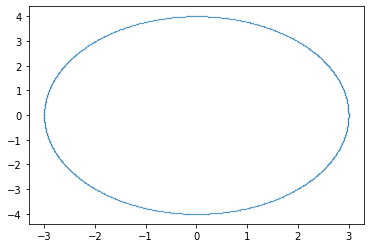

In [18]:
# old stuff
a = 3
b = 4
theta = np.linspace(0,2*np.pi,1000)
xfunc = a*np.cos(theta)
yfunc = b*np.sin(theta)
surf = pointsOfParameterizedSurface(xfunc,yfunc)
plt.scatter(surf[0],surf[1],s=0.1)
plt.show()